# DEMO BLUR IMAGE USIGN CV2

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

#Reading image from disk
dog = cv2.imread('/content/DEMO_01.jpg')
#Resizing image to make it smaller
dog = cv2.resize(dog, (128,128) )

#Applying different blur functions with 7*7 filter
img_0 = cv2.blur(dog, ksize = (7, 7))
img_1 = cv2.GaussianBlur(dog, (7, 7), 0)
img_2 = cv2.medianBlur(dog, 7)
img_3 = cv2.bilateralFilter(dog, 7, 75, 75)

#Displaying resultant images
cv2_imshow(dog)
cv2_imshow(img_0)
cv2_imshow(img_1)
cv2_imshow(img_2)
cv2_imshow(img_3)

# SET UP OJECT DETECTION 

1.   YOLO 4 
2.   OCR



In [ ]:
#@title Set up CONDA


In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:33
🔁 Restarting kernel...


In [1]:
!conda --version

conda 4.9.2


In [ ]:
#@title Main


In [2]:
!git clone https://github.com/theAIGuysCode/yolov4-custom-functions.git

Cloning into 'yolov4-custom-functions'...
remote: Enumerating objects: 251, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 251 (delta 2), reused 3 (delta 0), pack-reused 245
Receiving objects: 100% (251/251), 62.02 MiB | 36.92 MiB/s, done.
Resolving deltas: 100% (116/116), done.


In [3]:
cd /content/yolov4-custom-functions

/content/yolov4-custom-functions


In [4]:
!conda env create -f conda-cpu.yml

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 

In [5]:
cd /content/yolov4-custom-functions/data

/content/yolov4-custom-functions/data


In [6]:
import gdown
!gdown https://drive.google.com/u/2/uc?id=1EUPtbtdF0bjRtNjGv436vDY28EN5DXDH&export=download

Downloading...
From: https://drive.google.com/u/2/uc?id=1EUPtbtdF0bjRtNjGv436vDY28EN5DXDH
To: /content/yolov4-custom-functions/data/custom.weights
100% 256M/256M [00:02<00:00, 116MB/s]


In [7]:
cd /content/yolov4-custom-functions

/content/yolov4-custom-functions


In [15]:
!source activate yolov4-cpu && conda env list && conda list && python save_model.py --weights ./data/custom.weights --output ./checkpoints/custom-416 --input_size 416 --model yolov4 

# conda environments:
#
base                     /usr/local
yolov4-cpu            *  /usr/local/envs/yolov4-cpu

# packages in environment at /usr/local/envs/yolov4-cpu:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
absl-py                   1.1.0                    pypi_0    pypi
astunparse                1.6.3                    pypi_0    pypi
atk                       2.36.0               ha770c72_4    conda-forge
atk-1.0                   2.36.0               h3371d22_4    conda-forge
brotli                    1.0.9                h166bdaf_7    conda-forge
brotli-bin                1.0.9                h166bdaf_7    conda-forge
bzip2                     1.0.8                h7f98852_4    conda-forge
ca-certificates           2022.6.15            ha878542_0    conda-forge
cachetools                5.2.0              

In [17]:
!source activate yolov4-cpu && conda env list && conda list && python detect.py --weights ./checkpoints/yolov4-416 --size 416 --model yolov4 --images ./data/images/dog.jpg --count

# conda environments:
#
base                     /usr/local
yolov4-cpu            *  /usr/local/envs/yolov4-cpu

# packages in environment at /usr/local/envs/yolov4-cpu:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
absl-py                   1.1.0                    pypi_0    pypi
astunparse                1.6.3                    pypi_0    pypi
atk                       2.36.0               ha770c72_4    conda-forge
atk-1.0                   2.36.0               h3371d22_4    conda-forge
brotli                    1.0.9                h166bdaf_7    conda-forge
brotli-bin                1.0.9                h166bdaf_7    conda-forge
bzip2                     1.0.8                h7f98852_4    conda-forge
ca-certificates           2022.6.15            ha878542_0    conda-forge
cachetools                5.2.0              

# ESRGAN

In [ ]:
#@title Basic


In [ ]:
import os
import time
from PIL import Image
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
os.environ["TFHUB_DOWNLOAD_PROGRESS"] = "True"

In [ ]:
!wget "https://user-images.githubusercontent.com/12981474/40157448-eff91f06-5953-11e8-9a37-f6b5693fa03f.png" -O original.png

--2022-06-22 04:11:04--  https://user-images.githubusercontent.com/12981474/40157448-eff91f06-5953-11e8-9a37-f6b5693fa03f.png
Resolving user-images.githubusercontent.com (user-images.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to user-images.githubusercontent.com (user-images.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34146 (33K) [image/png]
Saving to: ‘original.png’

original.png        100%[===================>]  33.35K  --.-KB/s    in 0.002s  

2022-06-22 04:11:04 (14.0 MB/s) - ‘original.png’ saved [34146/34146]



In [ ]:
# Declaring Constants
IMAGE_PATH = "/content/yolov4-custom-functions/data/images/car2.jpg"
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"

In [ ]:
def preprocess_image(image_path):
  """ Loads image from path and preprocesses to make it model ready
      Args:
        image_path: Path to the image file
  """
  #image_path_new = Image.open(image_path)
  #image_path_new = image_path_new.resize((128, 128))
  hr_image = tf.image.decode_image(tf.io.read_file(image_path))
  # If PNG, remove the alpha channel. The model only supports
  # images with 3 color channels.
  if hr_image.shape[-1] == 4:
    hr_image = hr_image[...,:-1]
  hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 4) * 4
  hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1])
  #hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, 1024, 1024)
  hr_image = tf.cast(hr_image, tf.float32)
  return tf.expand_dims(hr_image, 0)

def save_image(image, filename):
  """
    Saves unscaled Tensor Images.
    Args:
      image: 3D image tensor. [height, width, channels]
      filename: Name of the file to save.
  """
  if not isinstance(image, Image.Image):
    image = tf.clip_by_value(image, 0, 255)
    image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  image.save("%s.jpg" % filename)
  print("Saved as %s.jpg" % filename)

In [ ]:
%matplotlib inline
def plot_image(image, title=""):
  """
    Plots images from image tensors.
    Args:
      image: 3D image tensor. [height, width, channels].
      title: Title to display in the plot.
  """
  image = np.asarray(image)
  image = tf.clip_by_value(image, 0, 255)
  image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  plt.imshow(image)
  plt.axis("off")
  plt.title(title)

In [ ]:
# Defining helper functions
def downscale_image(image):
  """
      Scales down images using bicubic downsampling.
      Args:
          image: 3D or 4D tensor of preprocessed image
  """
  image_size = []
  if len(image.shape) == 3:
    image_size = [image.shape[1], image.shape[0]]
  else:
    raise ValueError("Dimension mismatch. Can work only on single image.")

  image = tf.squeeze(
      tf.cast(
          tf.clip_by_value(image, 0, 255), tf.uint8))

  lr_image = np.asarray(
    Image.fromarray(image.numpy())
    .resize([image_size[0] // 4, image_size[1] // 4],
              Image.BICUBIC))

  lr_image = tf.expand_dims(lr_image, 0)
  lr_image = tf.cast(lr_image, tf.float32)
  return lr_image

In [ ]:
hr_image = preprocess_image(IMAGE_PATH)

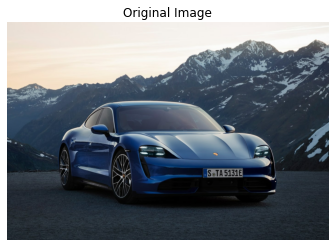

In [ ]:
# Plotting Original Resolution image
plot_image(tf.squeeze(hr_image), title="Original Image")
#save_image(tf.squeeze(hr_image), filename="Original Image")

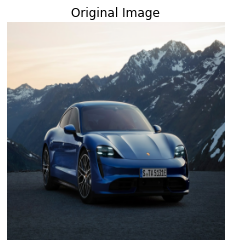

In [ ]:
import cv2
dim = (256, 256)

hr_image = tf.squeeze(hr_image)
hr_image_resized = cv2.resize(np.asarray(hr_image), dim, interpolation = cv2.INTER_AREA)
# Plotting Original Resolution image
plot_image(tf.squeeze(hr_image_resized), title="Original Image")
#save_image(tf.squeeze(hr_image_resized), filename="Original Image")

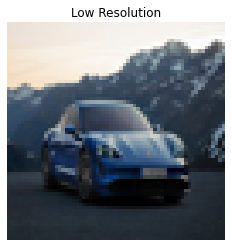

In [ ]:
lr_image = downscale_image(tf.squeeze(hr_image_resized))
# Plotting Low Resolution Image
plot_image(tf.squeeze(lr_image), title="Low Resolution")
#save_image(tf.squeeze(lr_image), filename="Low Image")

In [ ]:
model = hub.load(SAVED_MODEL_PATH)

Downloaded https://tfhub.dev/captain-pool/esrgan-tf2/1, Total size: 20.60MB



In [ ]:
start = time.time()
fake_image = model(lr_image)
fake_image = tf.squeeze(fake_image)
print("Time Taken: %f" % (time.time() - start))

Time Taken: 2.111588


Saved as Super Resolution.jpg


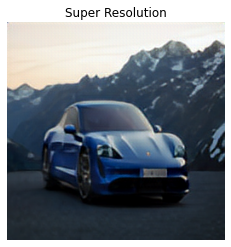

In [ ]:
# Plotting Super Resolution Image
plot_image(tf.squeeze(fake_image), title="Super Resolution")
save_image(tf.squeeze(fake_image), filename="Super Resolution")

In [ ]:
#@title OPEN 


In [ ]:
from glob import glob
IMAGE_PATH_NEW = sorted(glob("/content/yolov4-custom-functions/data/images/*"))
print('Total test images {}'.format(len(IMAGE_PATH_NEW)))

Total test images 6


In [ ]:
cd /content/yolov4-custom-functions/af_resolution

/content/yolov4-custom-functions/af_resolution


Saved as 1super_resolution.jpg
Saved as 2super_resolution.jpg
Saved as 3super_resolution.jpg
Saved as 4super_resolution.jpg
Saved as 5super_resolution.jpg
Saved as 6super_resolution.jpg


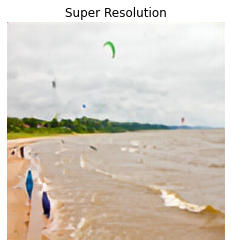

In [ ]:
import cv2 
dim = (256, 256)
i = 0
for i_path in IMAGE_PATH_NEW:
  hr_image = preprocess_image(i_path)
  hr_image = tf.squeeze(hr_image)
  hr_image_resized = cv2.resize(np.asarray(hr_image), dim, interpolation = cv2.INTER_AREA) 
  lr_image = downscale_image(tf.squeeze(hr_image_resized))
  fake_image = model(lr_image)
  fake_image = tf.squeeze(fake_image)
  hr_image = tf.squeeze(hr_image)
  i = i +1

  plot_image(tf.squeeze(fake_image), title="Super Resolution")
  save_image(tf.squeeze(fake_image), filename= str(i) + "super_resolution")

  

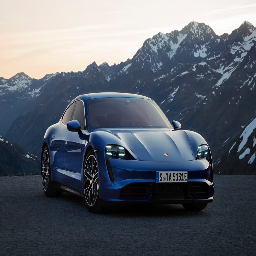

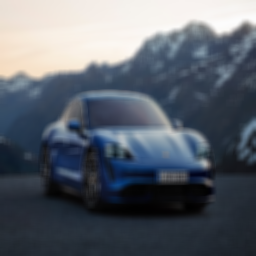

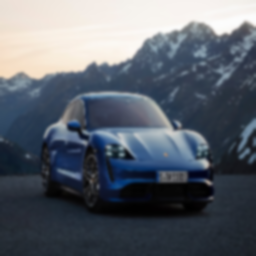

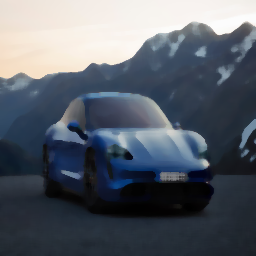

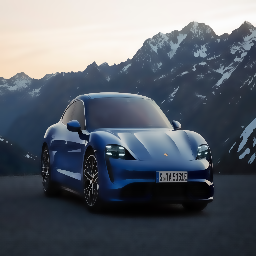

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

#Reading image from disk
dog = cv2.imread('/content/yolov4-custom-functions/data/images/car2.jpg')
#Resizing image to make it smaller
dog = cv2.resize(dog, (256,256) )

#Applying different blur functions with 7*7 filter
img_0 = cv2.blur(dog, ksize = (7, 7))
img_1 = cv2.GaussianBlur(dog, (7, 7), 0)
img_2 = cv2.medianBlur(dog, 7)
img_3 = cv2.bilateralFilter(dog, 7, 75, 75)

#save_image(tf.squeeze(img_1), filename="Image_1")
cv2.imwrite("test_01.jpg", img_1)

#Displaying resultant images
cv2_imshow(dog)
cv2_imshow(img_0)
cv2_imshow(img_1)
cv2_imshow(img_2)
cv2_imshow(img_3)

In [ ]:
model = hub.load(SAVED_MODEL_PATH)

Downloaded https://tfhub.dev/captain-pool/esrgan-tf2/1, Total size: 20.60MB



In [ ]:
hr_image = preprocess_image("/content/yolov4-custom-functions/test_01.jpg")

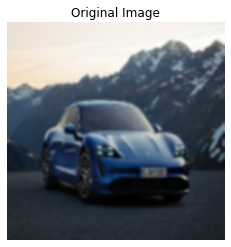

In [ ]:
# Plotting Original Resolution image
plot_image(tf.squeeze(hr_image), title="Original Image")

In [ ]:
start = time.time()
fake_image = model(hr_image)
fake_image = tf.squeeze(fake_image)
print("Time Taken: %f" % (time.time() - start))

Time Taken: 13.441834


Saved as AFTER_IMAGE_1.jpg


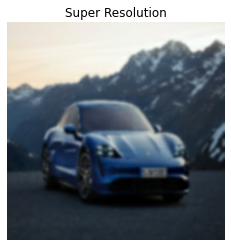

In [ ]:
# Plotting Super Resolution Image
plot_image(tf.squeeze(fake_image), title="Super Resolution")
save_image(tf.squeeze(fake_image), filename="AFTER_IMAGE_1")

In [ ]:
#@title ADVANCED_PSNR


In [ ]:
#@title A_1(Set up database from kaggle)


In [ ]:
!pip install kaggle

In [ ]:
!mkdir /root/.kaggle

In [ ]:
!cp kaggle.json /root/.kaggle

In [ ]:
! chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d saputrahas/dataset-image-super-resolution

In [ ]:
!unzip /content/dataset-image-super-resolution.zip

In [ ]:
#@title A_2(Calculate PSNR)


In [ ]:
from glob import glob
IMAGE_PATH_NEW = sorted(glob("/content/dataset-upload-to-kaggle/finished/valid/dataraw/hires/*"))
print('Total test images {}'.format(len(IMAGE_PATH_NEW[1000:])))

In [ ]:
model = hub.load(SAVED_MODEL_PATH)

In [ ]:
PSNR_LIST_NEW = []

In [ ]:
import cv2 
dim = (128, 128)


for i_path in IMAGE_PATH_NEW[1000:]:
  hr_image = preprocess_image(i_path)
  lr_image = downscale_image(tf.squeeze(hr_image))
  fake_image = model(lr_image)
  fake_image = tf.squeeze(fake_image)
  hr_image = tf.squeeze(hr_image)
  #fake_image_resized = cv2.resize(np.asarray(fake_image), dim, interpolation = cv2.INTER_AREA)
  #hr_image_resized = cv2.resize(np.asarray(hr_image), dim, interpolation = cv2.INTER_AREA)
  psnr = tf.image.psnr(
        tf.clip_by_value(fake_image, 0, 255),
        tf.clip_by_value(hr_image, 0, 255), max_val=255)
  PSNR_LIST_NEW.append(psnr)
  print("PSNR Achieved: %f" % psnr)

In [ ]:
sum = 0
count = 0
for psnr in PSNR_LIST_NEW:
  sum = sum + psnr
  count = count + 1

print(sum/count)
print(count)

In [ ]:
!pip install tensorflow==2.9.1

In [ ]:
import os
import numpy as np
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt

import tensorflow as tf
print(tf.__version__)

In [ ]:
!gdown https://drive.google.com/uc?id=1DdGIJ4PZPlF2ikl8mNM9V-PdVxVLbQi6
!unzip -q lol_dataset.zip

In [ ]:
!wget https://github.com/sayannath/Zero-DCE-TFLite/releases/download/0.0.1/zero-dce-saved-model.zip
!unzip -q "zero-dce-saved-model.zip"

In [ ]:
SAVED_MODEL_FILE = 'zero-dce-saved-model/'
TFLITE_MODEL_FILE = 'zero-dce.tflite'

In [ ]:
!pip install keras

In [ ]:
import keras

In [ ]:
# Load the save model
model = keras.models.load_model(SAVED_MODEL_FILE)

# Convert the save model into tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open(TFLITE_MODEL_FILE, 'wb').write(tflite_model)

print('Model size is %f MBs.' % (len(tflite_model) / 1024 / 1024.0))

In [ ]:
interpreter = tf.lite.Interpreter(model_path = TFLITE_MODEL_FILE)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

In [ ]:
test_low_light_images = sorted(glob("./lol_dataset/eval15/low/*"))
print('Total test images {}'.format(len(test_low_light_images)))

In [ ]:
IMG_HEIGHT=600
IMG_WIDTH=400

In [ ]:
def preprocess_image(image_path):
    original_image = Image.open(image_path)
    width, height = original_image.size
    # Resize for original image
    original_image_new = original_image.resize(
        (
            IMG_HEIGHT,
            IMG_WIDTH
        ),
        Image.ANTIALIAS)
    # Main
    preprocessed_image = original_image.resize(
        (
            IMG_HEIGHT,
            IMG_WIDTH
        ),
        Image.ANTIALIAS)
    preprocessed_image = tf.keras.preprocessing.image.img_to_array(preprocessed_image)
    preprocessed_image = preprocessed_image.astype('float32') / 255.0
    preprocessed_image = np.expand_dims(preprocessed_image, axis=0)
    
    return original_image_new, preprocessed_image

In [ ]:
def infer_tflite(image):
    interpreter = tf.lite.Interpreter(model_path = TFLITE_MODEL_FILE)
    input_index = interpreter.get_input_details()[0]["index"]
    output_index = interpreter.get_output_details()[0]["index"]
    
    interpreter.allocate_tensors()
    interpreter.set_tensor(input_index, image)
    interpreter.invoke()
    raw_prediction = interpreter.tensor(output_index)
    output_image = raw_prediction()

    output_image = output_image.squeeze() * 255.0
    output_image = output_image.clip(0, 255)
    output_image = output_image.reshape(
        (np.shape(output_image)[0], np.shape(output_image)[1], 3)
    )
    output_image = Image.fromarray(np.uint8(output_image))
    return output_image

In [ ]:
def plot_results(images, titles, figure_size=(12, 12)):
    fig = plt.figure(figsize=figure_size)
    for i in range(len(images)):
        fig.add_subplot(1, len(images), i + 1).set_title(titles[i])
        _ = plt.imshow(images[i])
        plt.axis("off")
    plt.show()

In [ ]:
#@title Inference on the TF-Lite Model


In [ ]:
for image_path in test_low_light_images:
    original_image, preprocessed_image = preprocess_image(image_path)
    output_image = infer_tflite(preprocessed_image)
    plot_results(
        [original_image, output_image],
        ["Original Image", "Enhanced Image"],
        (20, 12),
    )

In [ ]:
#@title PSNR


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
test_low_light_images = sorted(glob("/content/drive/MyDrive/Pre-Train-Model_DPL/DATASET_TEST/Blur/defocused_blurred/*"))
print('Total test images {}'.format(len(test_low_light_images)))

In [ ]:
for image_path in test_low_light_images:
    original_image, preprocessed_image = preprocess_image(image_path)
    output_image = infer_tflite(preprocessed_image)
  

In [ ]:
from math import log10, sqrt
import cv2
import numpy as np

PSNR_LIST = []
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  
def main_program():
     #original = cv2.imread("original_image.png")
     #compressed = cv2.imread("compressed_image.png", 1)
     for image_path in test_low_light_images:
       original_image, preprocessed_image = preprocess_image(image_path)
       output_image = infer_tflite(preprocessed_image)

       im_np_01 = np.asarray(original_image)
       im_np_02 = np.asarray(output_image)

       original = im_np_01
       compressed = im_np_02

       #original = cv2.imread(original_image)
       #compressed = cv2.imread(output_image)
       value = PSNR(original, compressed)
       PSNR_LIST.append(value)
       print(f"PSNR value is {value} dB")


main_program()

In [ ]:
total = 0
count = 0
for psnr in PSNR_LIST:
  total = total + psnr
  count =  count + 1 

print(total/count)
print(count)